# 2014~2020까지 11, 12월달 벅스차트 뽑아와서 크리스마스 연금노래 그래프 그려보기2

In [21]:
import pandas
import calendar
from matplotlib import pyplot
from numpy import nan

In [18]:
charts = pandas.DataFrame(columns = ['year','date','rank','title','artist','album'])

for year in range(2014, 2021, 1):
    for month in range(11, 13, 1):
        days = calendar.monthrange(year, month)[1] + 1 # 12월이 31일이기 때문
        for day in range(1, days, 1):
            filename = rf'.\Bugs\bugs_chart_{year}.{month:02}.xls'
            date = f'{year}{month:02}{day:02}'
            df = pandas.read_excel(filename, sheet_name = date)
            df.insert(0,'year',year)
            df.insert(0,'date',f'{month:02}-{day:02}')
            charts = pandas.concat([charts, df], axis = 0)
charts.set_index(['year','date'],inplace=True)
charts

rank                          title            artist  \
year date                                                          
2014 11-01    1      헤픈엔딩 (feat. 조원선 Of 롤러코스터)  에픽하이 (EPIK HIGH)   
     11-01    2                        12시 30분        비스트(Beast)   
     11-01    3          언제쯤이면 (duet with 아이유)               윤현상   
     11-01    4                           스포일러  에픽하이 (EPIK HIGH)   
     11-01    5                    어떻게 사랑이 그래요               이승환   
...         ...                            ...               ...   
2020 12-31   96  Ice Cream (with Selena Gomez)         BLACKPINK   
     12-31   97                         METEOR       창모(CHANGMO)   
     12-31   98           뚜두뚜두 (DDU-DU DDU-DU)         BLACKPINK   
     12-31   99  Bet You Wanna (Feat. Cardi B)         BLACKPINK   
     12-31  100              사계 (Four Seasons)      태연 (TAEYEON)   

                                    album  
year date                                  
2014 11-01                            신발장  
     11-01                           Time  
     11-01            피아노포르테 (Pianoforte)  
     11-01                            신발장  
     11-01                     Hwantastic  
...                                   ...  
2020 12-31  Ice Cream (with Selena Gomez)  
     12-31                        Boyhood  
     12-31                      SQUARE UP  
     12-31                      THE ALBUM  
     12-31              사계 (Four Seasons)  

[42700 rows x 4 columns]

In [19]:
charts['rank'] = charts['rank'].astype('int')

song = 'All I Want for Christmas Is You'

mask = charts['title'] == song
ndf = charts[mask]
ndf.head()

rank                            title                 artist  \
year date                                                                  
2014 12-13    51  All I Want for Christmas Is You  Mariah Carey(머라이어 캐리)   
     12-14    66  All I Want for Christmas Is You  Mariah Carey(머라이어 캐리)   
     12-15    61  All I Want for Christmas Is You  Mariah Carey(머라이어 캐리)   
     12-16    52  All I Want for Christmas Is You  Mariah Carey(머라이어 캐리)   
     12-17    55  All I Want for Christmas Is You  Mariah Carey(머라이어 캐리)   

                                                   album  
year date                                                 
2014 12-13  Merry Christmas (Deluxe Anniversary Edition)  
     12-14  Merry Christmas (Deluxe Anniversary Edition)  
     12-15  Merry Christmas (Deluxe Anniversary Edition)  
     12-16  Merry Christmas (Deluxe Anniversary Edition)  
     12-17  Merry Christmas (Deluxe Anniversary Edition)

In [33]:
# 더미변수 만들기
ndf2 = pandas.DataFrame(columns=['year','date','rank'])
for year in range(2014,2021,1):
    for month in range(11,13,1):
        days = calendar.monthrange(year,month)[1] + 1
        for day in range(1, days, 1):
            date = f'{month:02}-{day:02}'
            ndf2 = ndf2.append([{'year':year, 'date':date, 'rank':nan}])
ndf2.set_index(['year','date'],inplace = True)
ndf2.head()

rank
year date      
2014 11-01  NaN
     11-02  NaN
     11-03  NaN
     11-04  NaN
     11-05  NaN

In [38]:
ndf3 = pandas.concat([ndf[['rank']], ndf2], axis = 0)
ndf3 = ndf3.reset_index().drop_duplicates(subset = ['year','date'])
ndf3.set_index(['year','date'], inplace=True)
ndf3

rank
year date      
2014 12-13   51
     12-14   66
     12-15   61
     12-16   52
     12-17   55
...         ...
2020 11-22  NaN
     11-23  NaN
     11-24  NaN
     11-25  NaN
     11-26  NaN

[427 rows x 1 columns]

In [53]:
ndf3['rank'] = ndf3['rank'].astype(float)

In [54]:
ndf3.sort_index(axis = 0 , ascending = True) # 인덱스 정렬

rank
year date       
2014 11-01   NaN
     11-02   NaN
     11-03   NaN
     11-04   NaN
     11-05   NaN
...          ...
2020 12-27  24.0
     12-28  30.0
     12-29  55.0
     12-30  52.0
     12-31  55.0

[427 rows x 1 columns]

(100.0, 0.0)

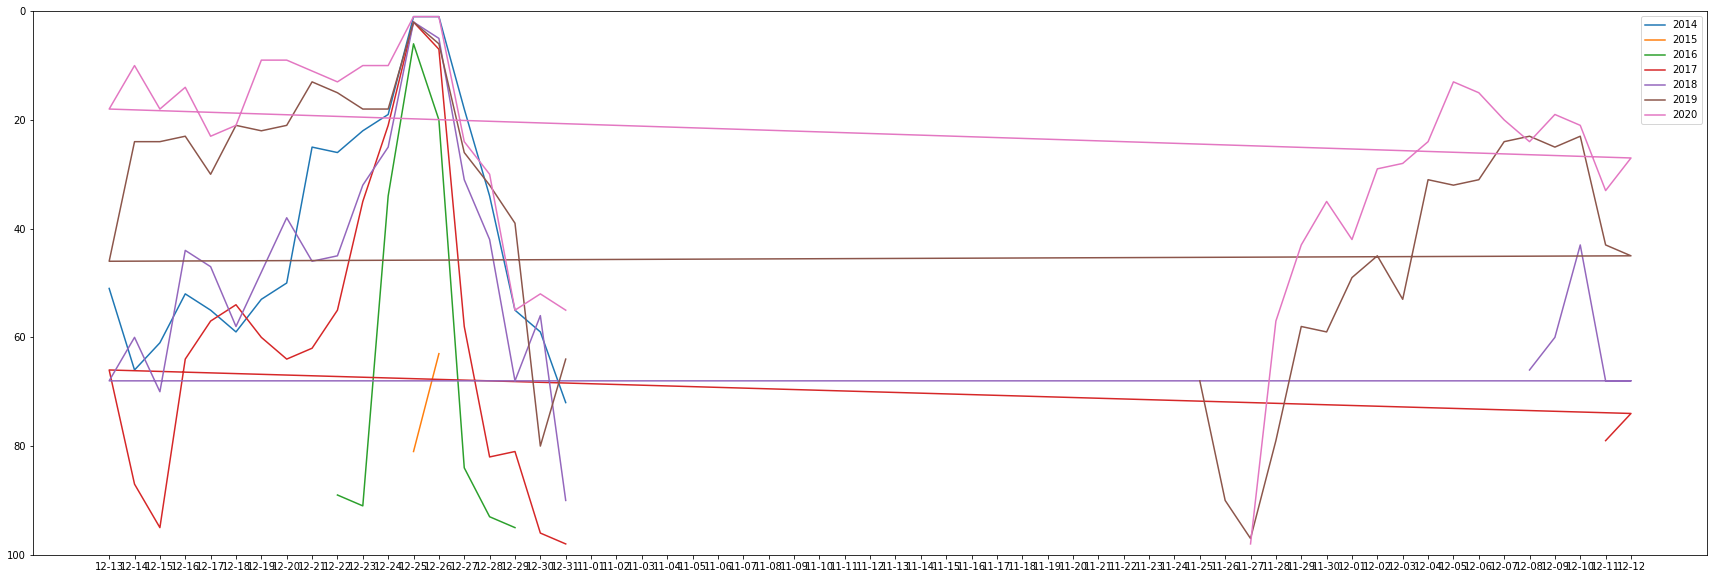

In [55]:
figure = pyplot.figure(figsize=(30,10))
ax = figure.add_subplot(1,1,1)

for i in range(2014,2021):    
    ax.plot(ndf3.loc[i]['rank'], label = i)
    
pyplot.legend(loc = 'upper right')
pyplot.ylim(100,0)